In [1]:
import traffic
import pandas as pd 
import os
from traffic.core import Traffic
from biblio_herramienta.herramienta import *
from biblio_herramienta.tratardatos import *

In [2]:
carpetaDatos = r'datos_sectores/' # carpeta que contiene los datos
nombreDatos = "datos_filtrados.csv" 
vuelos = cargardatosfiltrados(carpetaDatos,nombreDatos)
vuelos

count
icao24 callsign       
4ca60f IBK5BV     3683
4cace5 IBK6054    2974
       IBK6055    2343
49514c TAP434M    2175
344495 GES381L    2052
4cacc6 RYR3PE     2036
4853d1 TRA6845    1926
4cabae RYR4Z      1886
3c56f7 EWG4TP     1814
4ca8da RYR6BM     1805

In [3]:
vuelos_un = vuelos.assign_id().unwrap().eval(max_workers=4)

In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


vuelos_kmeans = vuelos_un.clustering(
    nb_samples=15, # divide en 15 puntos las trayecorias
    features=["longitude", "latitude", "track_unwrapped"], # datos cebados al algorimto de ML
    clustering=KMeans(init = "random",
                     n_clusters = 14,
                     n_init = 10,
                     random_state = 7), # algoritmo de ML utilizado, con los parámetros del mismo
    transform=StandardScaler(), # lo que hace esto es escalar los datos dentro de una distribuciñ¡ón Gausiana
).fit_predict()


In [5]:
vuelos_kmeans.data.cluster.max()

13

AttributeError: 'NoneType' object has no attribute 'plot'

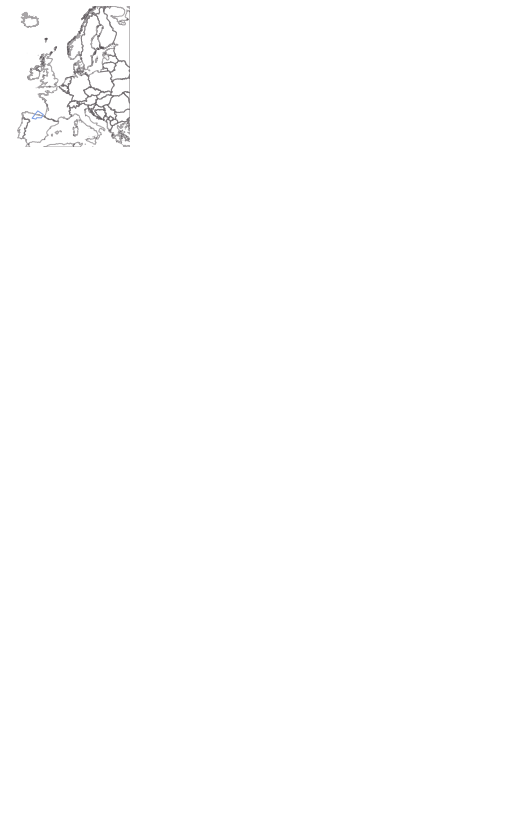

In [6]:
representarcluster(vuelos_kmeans,"cluster_kmeans.png")

No consigo representar el k-means, paso a otro algoritmo